In [1]:
!pip install neurolab

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22180 sha256=bcd75dc6a5b7b48017f6e2e41d3f5563f071f09b5471bd4a4383b348305c5366
  Stored in directory: /root/.cache/pip/wheels/5e/ee/92/6e99c58786234fd536e400ac1f98af9cf9b43ee4ac8fec4204
Successfully built neurolab


In [2]:
import numpy as np
import neurolab as nl
import matplotlib.pyplot as plt

# Create the Neural Network

In [3]:
# Two-Layer feedforward neural network

net = nl.net.newff([[-10, 10]], [15, 1])

# Input range: [-10, 10]
# Hidden layer: 15 neurons
# Output layer: 1 neuron

# Generate Training Data

In [14]:
# Input vector: 100 points (-10 and 10)

x = np.linspace(-10, 10, 100)

# Target values: cosine function
y = 0.75 * np.cos(x)

# Reshape data

In [5]:
size = len(x)
inp = x.reshape(size, 1)  # Input vector
trg = y.reshape(size, 1)  # Target vector

# Train the Neural Network

In [6]:
# 300 epochs
# Show error every 100 epochs
# Goal error: 0.01
error = net.train(inp, trg, epochs=300, show=100, goal=0.01)

Epoch: 100; Error: 0.028093719305896055;
Epoch: 200; Error: 0.016090418665264696;
Epoch: 300; Error: 0.0148353093708838;
The maximum number of train epochs is reached


# Generate Network Output

In [7]:
# Simulate network with input data
out = net.sim(inp)

# Visualize Results

In [16]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

# Plot Training Error

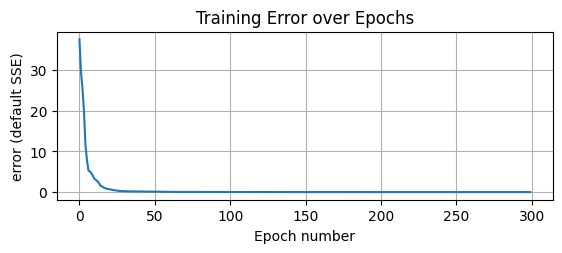

In [9]:
plt.subplot(211)
plt.plot(error)
plt.xlabel('Epoch number')
plt.ylabel('error (default SSE)')
plt.title('Training Error over Epochs')
plt.grid(True)

# Plot Network Output vs Target

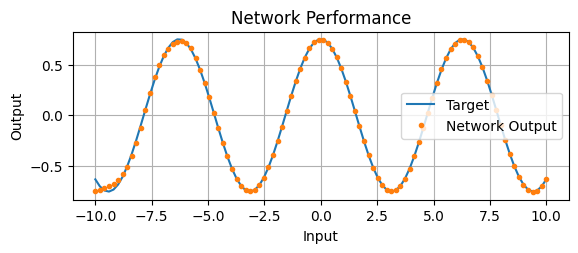

In [10]:
plt.subplot(212)
plt.plot(inp, trg, '-', label='Target')
plt.plot(inp, out, '.', label='Network Output')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Network Performance')
plt.legend()
plt.grid(True)

In [11]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Experiment with Different Parameters

In [12]:
# Fewer training points
x_sparse = np.linspace(-10, 10, 20)  # 20 points
y_sparse = 0.75 * np.cos(x_sparse)
inp_sparse = x_sparse.reshape(len(x_sparse), 1)
trg_sparse = y_sparse.reshape(len(x_sparse), 1)

# Create and train network with sparse data
net_sparse = nl.net.newff([[-10, 10]], [15, 1])
error_sparse = net_sparse.train(inp_sparse, trg_sparse, epochs=300, show=100, goal=0.01)
out_sparse = net_sparse.sim(inp)  # Simulate full input range

The goal of learning is reached


# Plot results with sparse training

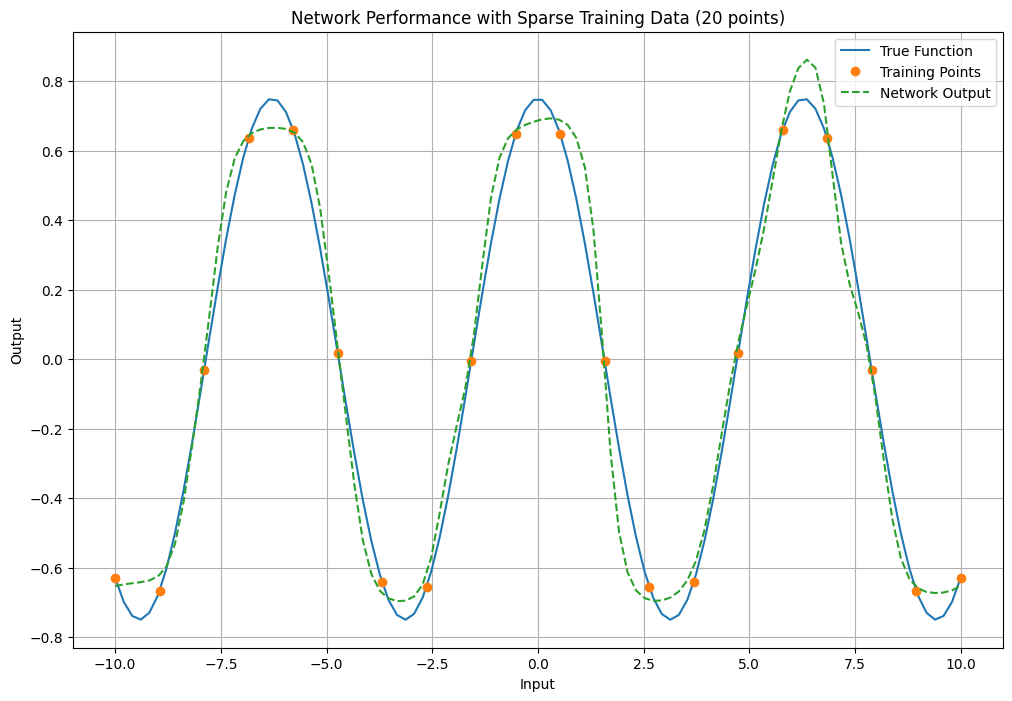

In [13]:
plt.figure(figsize=(12, 8))
plt.plot(inp, trg, '-', label='True Function')
plt.plot(inp_sparse, trg_sparse, 'o', label='Training Points')
plt.plot(inp, out_sparse, '--', label='Network Output')
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Network Performance with Sparse Training Data (20 points)')
plt.legend()
plt.grid(True)
plt.show()